In [1]:
sd<-read.csv("/Users/hansooyeon/Documents/rproject/서울대전최종.csv")

In [4]:
table(sd$일차)


  0   1   2   3   4 
192 192 192 192 192 

In [5]:
table(sd$출발시간)


 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 

In [6]:
table(sd$소요시간)


  0  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93 
 32   2   2   3   5  18  22  21  30  25  38  34  38  54  46  55  40  40  30  35 
 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 
 22  18  11  14   6  12   5   5  12   5   9   3   7   5   5   3   2   7   7   5 
114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 
  1   2   1   2   6   4   2   5   2   3   2   4   2   3   3   2   1   3   3   6 
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 
  2   2   1   2   1   5   1   1   1   4   5   4   4   4   3   4   4   2   3   2 
154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 
  4   3   3   3   4   1   4   2   2   2   1   3   3   2   3   1   3   2   2   1 
174 176 177 178 180 181 182 183 184 185 187 188 191 192 194 195 196 200 201 202 
  2   2   3   1   1   2   2   3   1   2   4   2   3   3   1   1   2   2   1   1 
203 205 206 207 211 212 215

In [7]:
str(sd)
summary(sd)
#소요시간 0인 데이터 어떻게 처리할지 

'data.frame':	960 obs. of  4 variables:
 $ 년도    : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ 일차    : int  0 1 2 3 4 0 1 2 3 4 ...
 $ 출발시간: int  0 0 0 0 0 1 1 1 1 1 ...
 $ 소요시간: int  91 132 83 87 84 88 129 82 85 82 ...


      년도           일차      출발시간        소요시간    
 Min.   :2013   Min.   :0   Min.   : 0.00   Min.   :  0.0  
 1st Qu.:2015   1st Qu.:1   1st Qu.: 5.75   1st Qu.: 86.0  
 Median :2016   Median :2   Median :11.50   Median : 91.0  
 Mean   :2016   Mean   :2   Mean   :11.50   Mean   :103.6  
 3rd Qu.:2018   3rd Qu.:3   3rd Qu.:17.25   3rd Qu.:111.0  
 Max.   :2020   Max.   :4   Max.   :23.00   Max.   :289.0  

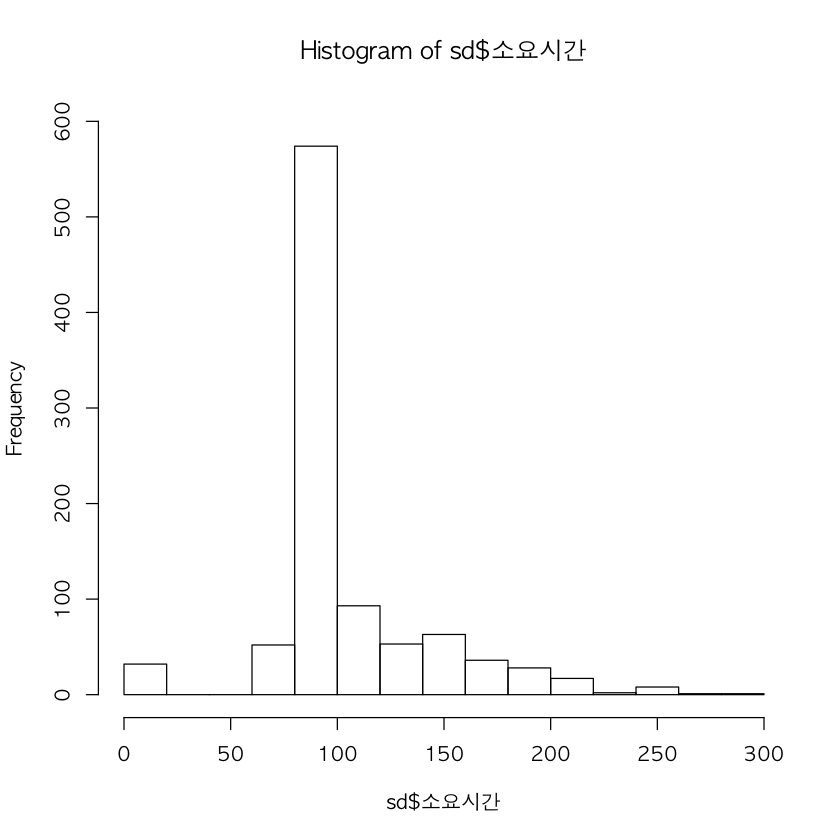

In [8]:
options(warn = -1)
par(family = "AppleGothic")
hist(sd$소요시간,
    ylim=c(0,600))

In [177]:
train<-sd[,c(2:4)]
head(train)

일차,출발시간,소요시간
0,0,91
1,0,132
2,0,83
3,0,87
4,0,84
0,1,88


In [76]:
library(caret)

In [77]:
samp<-createDataPartition(train$소요시간,p=0.7,list=F)

In [78]:
data.train<-train[samp,]
str(data.train)

'data.frame':	674 obs. of  3 variables:
 $ 일차    : int  0 4 0 1 2 3 0 3 4 0 ...
 $ 출발시간: int  0 0 1 1 1 1 2 2 2 3 ...
 $ 소요시간: int  91 84 88 129 82 85 88 89 78 87 ...


In [79]:
data.test<-train[-samp,]
str(data.test)

'data.frame':	286 obs. of  3 variables:
 $ 일차    : int  1 2 3 4 1 2 2 3 0 1 ...
 $ 출발시간: int  0 0 0 1 2 2 3 3 4 4 ...
 $ 소요시간: int  132 83 87 82 121 102 100 84 91 119 ...


In [80]:
library(randomForest)

In [81]:
rf<- randomForest(소요시간~.,data=data.train,ntree=100)

In [82]:
x<-subset(data.test,select=-소요시간)
y<-data.test$소요시간

In [184]:
pred<-predict(rf,x)
test<-data.frame(data.test$일차,data.test$출발시간,pred,y,ifelse((pred-pred*0.2<y&y<pred+pred*0.2),"true","false"))

In [185]:
head(test)

,data.test.일차,data.test.출발시간,pred,y,ifelse..pred...pred...0.2...y...y...pred...pred...0.2....true...
2,1,0,129.74201,132,true
3,2,0,88.46228,83,true
4,3,0,86.98868,87,true
10,4,1,85.38597,82,true
12,1,2,132.85965,121,true
13,2,2,88.19959,102,true


In [186]:
colnames(test)<-c("일자","출발시간","pred","y","bool")
test

,일자,출발시간,pred,y,bool
2,1,0,129.74201,132,true
3,2,0,88.46228,83,true
4,3,0,86.98868,87,true
10,4,1,85.38597,82,true
12,1,2,132.85965,121,true
13,2,2,88.19959,102,true
18,2,3,89.12955,100,true
19,3,3,86.85285,84,true
21,0,4,90.63749,91,true
22,1,4,133.34175,119,true


In [187]:
#총 row 갯수
nrow(test)

[1] 286

In [188]:
#맞춘 row 갯수
sum(test$bool=="true")

[1] 209

In [189]:
#예측률 
sum(test$bool=="true")/nrow(test)

[1] 0.7307692